In [1]:
%matplotlib inline
from __future__ import division
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5.5})

In [2]:
tdf = np.loadtxt("2df_matched_kids.dat")

In [10]:
z = tdf[3,:]
ra , dec = tdf[1,:] , tdf[2,:]

In [12]:
import h5py
spec = h5py.File("reduced_speckids.h5")

/software/local/lib64/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
sra , sdec , sz = spec['RA'][:] , spec['DEC'][:] , spec['redshift'][:]

Text(0.5,1,u'Note the yellow points, GAMA G23, in the South')

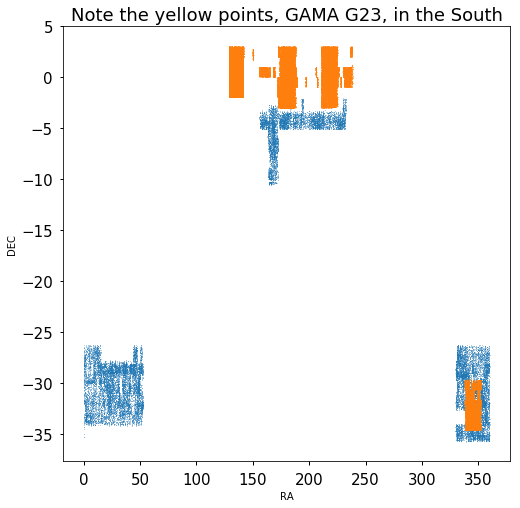

In [158]:
plt.figure(figsize=(8,8))
plt.scatter(ra , dec , s= 0.1)
plt.scatter(sra , sdec , s = 0.1)
#plt.ylim(-40, -20)
plt.xlabel("RA" , fontsize = 10)
plt.ylabel("DEC" , fontsize = 10)
plt.title("Note the yellow points, GAMA G23, in the South")

(10, 50000)

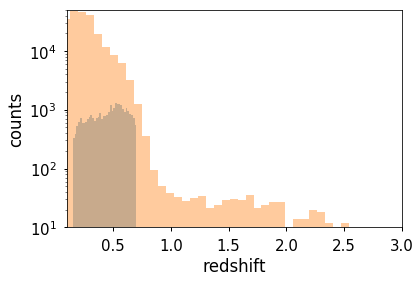

In [58]:
sns.distplot(z , kde = False)
sns.distplot(sz , kde = False)
plt.yscale("log")
plt.xlabel("redshift")
plt.ylabel("counts")
plt.xlim(0.1,3.0)
plt.ylim(10,50000)

In [52]:
gr = spec['colors'][:,1]
mask = sdec >-10
print sz[~mask].shape

(34414,)


Text(0.5,1,u'GAMA G23 covers redshifts as large as z~3')

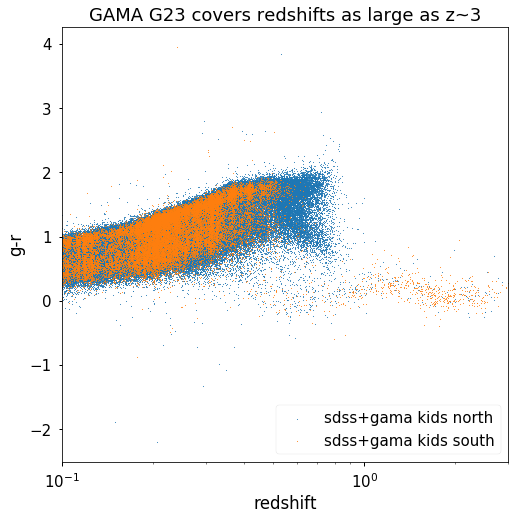

In [57]:
plt.figure(figsize=(8,8))
plt.scatter(sz[mask] , gr[mask] , s = 0.5 , label = 'sdss+gama kids north')
plt.scatter(sz[~mask] , gr[~mask] , s = 0.5 , label = 'sdss+gama kids south')
plt.xlim(0.1,3)
plt.xlabel("redshift")
plt.ylabel("g-r")
plt.xscale("log")
plt.legend()
plt.title("GAMA G23 covers redshifts as large as z~3")

In [62]:
kids = h5py.File("reduced_kids.h5")

Text(0.5,1,u'Note the yellow points, GAMA G23, in the South')

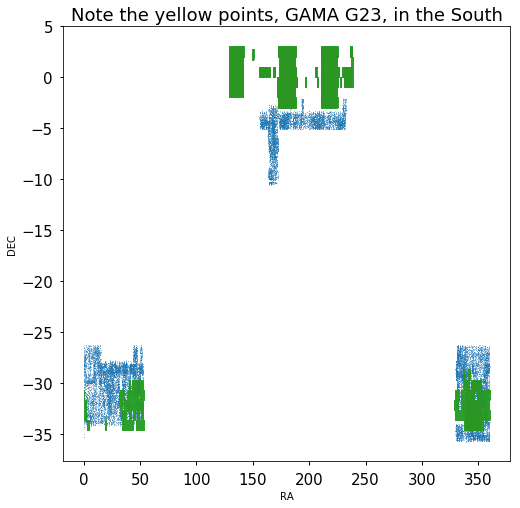

In [97]:
plt.figure(figsize=(8,8))
plt.scatter(ra , dec , s= 0.1)
plt.scatter(sra , sdec , s = 0.1)
plt.scatter(kids['RA'][:] , kids['DEC'][:] , s = 0.01)
plt.xlabel("RA" , fontsize = 10)
plt.ylabel("DEC" , fontsize = 10)
plt.title("Note the yellow points, GAMA G23, in the South")

In [145]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [178]:
c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)
cs = SkyCoord(ra=sra*u.degree, dec=sdec*u.degree)
idx, d2d, d3d = c.match_to_catalog_sky(cs) 

In [184]:
c2 = SkyCoord(ra=kids['RA'][:]*u.degree, dec=kids['DEC'][:]*u.degree)

In [185]:
idx, d2d, d3d = c.match_to_catalog_sky(c2) 

In [186]:
idx.shape

(29467,)

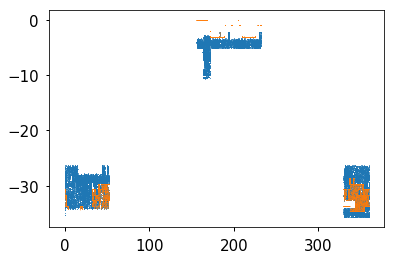

In [197]:
plt.scatter(ra, dec , s = 0.4)
plt.scatter(kids['RA'][:][idx] , kids['DEC'][:][idx] , s = 0.05)


In [ ]:
plt.